# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from IPython.core.display import Image, display

C:\Users\arthu\AppData\Local\Temp\ipykernel_22540\29354070.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


In [2]:
#from utils.plotting_functions import plot_sensor_group

In [3]:
import warnings # Ignore alert messages
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams.update({
    'font.size': 18,
    'axes.linewidth':2,
    'axes.titlesize': 20,
    'lines.linewidth' : 1.5,
    'lines.markersize' : 10,
    'figure.figsize': (25,10),
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15,
    'font.family': 'Arial',
    'legend.fontsize':14,
    'axes.labelsize':20
})

# Objective

This notebook will focus on importing the dataset generated from SIMPACK and some initial preprocessing steps. The generated dataset will be used in notebook 2 for exploratory data analysis

# Dataset description

There are a total of 56 datasets with 55 columns. Each dataset describes the measurement of data from a simulated instrumented railway vehicle (IRV) for different classes of irregularities. These classes are as follows:

-  No irregularities
-  FRA6 (best irregularity class);
-  FRA5;
-  FRA4;
-  FRA3 (worst irregularity class).

The information provided can be seen the table below:

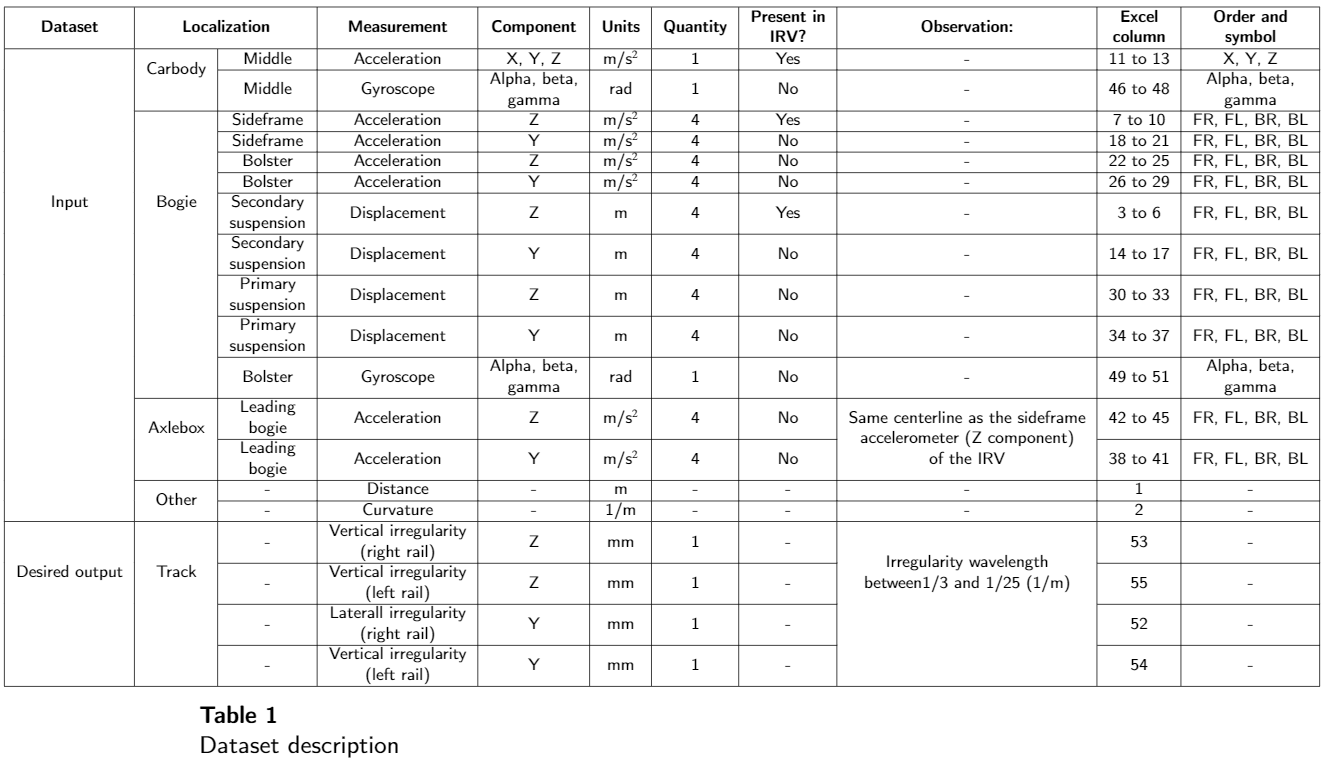

In [5]:
Image(filename='Images/Table_dataset_description.png')

From Table 1, we can see the sensor position three main locations: carbody, bogie and axlebox. 

The real service IRV only has the sensors shown in column "Present in IRV". The other sensors are created with the objective of determining if additional instrumentation will be needed for the given application. 

Different quantities of sensores are also seen. These sensors are placed in different locations on different bogies or different axleboxes.  

In the far right side, the corresponding column number, order and symbol. This is used to rename the columns for an easier name. The symbols mean:

-  FR: Front bogie, right side
-  FL: Front bogie, left side
-  BR: Back bogie, right side
-  BL: Back bogie, left side


The data was simulated in SIMPACK with a constant velocity for our initial analysis. The simulation macrogeometry is shown below. It consists of 7.4 km of track from a real railway segment

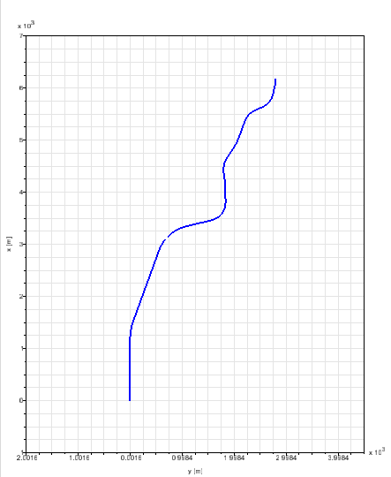

In [6]:
Image(filename='Images/macrogeometry.png')

# Importing all datasets

## Input dataset

The datasets below were obtained from simulation inside SIMPACK. The railway macrogeometry is shown below:

In [7]:
df_FRA6 = pd.read_csv('Dataset/FRA6.csv',header=0)
df_FRA5 = pd.read_csv('Dataset/FRA5.csv',header=0)
df_FRA4 = pd.read_csv('Dataset/FRA4.csv',header=0)
df_FRA3 = pd.read_csv('Dataset/FRA3.csv',header=0)
df_no_irreg = pd.read_csv('Dataset/no_irregularities.csv', header=0)

We create a new variable called "class" to better differentiate the datasets. This is done to help the exploratory data analysis in identifying how track severity relates to the measured signal. More information will be provided in the notebook "2 - exploratory data analysis - real variables"

In [8]:
df_no_irreg['Class'] = 'No Irr'
df_FRA3['Class'] = 'FRA3'
df_FRA4['Class'] = 'FRA4'
df_FRA5['Class'] = 'FRA5'
df_FRA6['Class'] = 'FRA6'

In [9]:
df_no_irreg

,distance,curvatura,sensor pos.$S_SG_C1_07_FR.z,sensor pos.$S_SG_C1_04_FL.z,sensor pos.$S_SG_C1_06_BR.z,sensor pos.$S_SG_C1_05_BL.z,force output.$C_AU_AC3_17_FR.Acceleration in z,force output.$C_AU_AC1_14_FL.Acceleration in z,force output.$C_AU_AC4_16_BR.Acceleration in z,force output.$C_AU_AC2_15_BL.Acceleration in z,...,sensor ang pos.$S_IMU.beta,sensor ang pos.$S_IMU.gamma,sensor ang pos.$S_IMU_Bolster.alpha,sensor ang pos.$S_IMU_Bolster.beta,sensor ang pos.$S_IMU_Bolster.gamma,result.$S_Truck_F.$RS_RWP_wheelset_F_Right.$RS_RWP_wheelset_F_Right_Pair.y_irreg Lateral rail irregularity,result.$S_Truck_F.$RS_RWP_wheelset_F_Right.$RS_RWP_wheelset_F_Right_Pair.z_irreg Vertical rail irregularity,result.$S_Truck_F.$RS_RWP_wheelset_F_Left.$RS_RWP_wheelset_F_Left_Pair.y_irreg Lateral rail irregularity,result.$S_Truck_F.$RS_RWP_wheelset_F_Left.$RS_RWP_wheelset_F_Left_Pair.z_irreg Vertical rail irregularity,Class
0,7.2272,3.510000e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,No Irr
1,7.3352,3.080000e-15,-8.330000e-16,-9.990000e-16,-1.220000e-15,-1.720000e-15,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-4.740000e-34,0.000000e+00,0.000000e+00,1.970000e-33,0,0,0,0,No Irr
2,7.4432,2.660000e-15,-6.110000e-16,-8.330000e-16,-1.940000e-15,-1.440000e-15,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-1.510000e-33,0.000000e+00,0.000000e+00,3.740000e-33,0,0,0,0,No Irr
3,7.5512,2.230000e-15,-6.110000e-16,-1.110000e-16,-1.940000e-15,-8.330000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-2.180000e-34,0.000000e+00,0.000000e+00,-1.030000e-32,0,0,0,0,No Irr
4,7.6592,1.800000e-15,-3.330000e-16,1.110000e-16,-1.720000e-15,-1.110000e-15,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,5.360000e-33,0.000000e+00,0.000000e+00,-8.990000e-33,0,0,0,0,No Irr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68512,7406.5210,4.870000e-09,-3.840000e-05,-2.686180e-04,8.380000e-05,3.760000e-05,-9.808835,-9.811075,-9.809221,-9.809754,...,6.780000e-21,-2.390000e-17,1.360000e-20,6.780000e-21,8.530000e-18,0,0,0,0,No Irr
68513,7406.6290,1.540000e-08,-3.900000e-05,-2.663720e-04,8.850000e-05,3.260000e-05,-9.808892,-9.811053,-9.809464,-9.809767,...,1.360000e-20,-2.710000e-17,0.000000e+00,0.000000e+00,7.970000e-18,0,0,0,0,No Irr
68514,7406.7370,1.990000e-08,-3.940000e-05,-2.643900e-04,9.290000e-05,2.780000e-05,-9.808976,-9.810993,-9.809899,-9.809697,...,6.780000e-21,-2.890000e-18,1.360000e-20,0.000000e+00,4.880000e-18,0,0,0,0,No Irr
68515,7406.8450,1.690000e-08,-3.980000e-05,-2.624090e-04,9.740000e-05,2.290000e-05,-9.809060,-9.810932,-9.810333,-9.809628,...,-1.360000e-20,-4.830000e-18,-1.360000e-20,0.000000e+00,-7.080000e-18,0,0,0,0,No Irr


Concatenating all dataframes in order to form a singular dataset

In [10]:
df = pd.concat([df_no_irreg,df_FRA6,df_FRA5,df_FRA4,df_FRA3],axis=0,ignore_index=True)
df

,distance,curvatura,sensor pos.$S_SG_C1_07_FR.z,sensor pos.$S_SG_C1_04_FL.z,sensor pos.$S_SG_C1_06_BR.z,sensor pos.$S_SG_C1_05_BL.z,force output.$C_AU_AC3_17_FR.Acceleration in z,force output.$C_AU_AC1_14_FL.Acceleration in z,force output.$C_AU_AC4_16_BR.Acceleration in z,force output.$C_AU_AC2_15_BL.Acceleration in z,...,sensor ang pos.$S_IMU.beta,sensor ang pos.$S_IMU.gamma,sensor ang pos.$S_IMU_Bolster.alpha,sensor ang pos.$S_IMU_Bolster.beta,sensor ang pos.$S_IMU_Bolster.gamma,result.$S_Truck_F.$RS_RWP_wheelset_F_Right.$RS_RWP_wheelset_F_Right_Pair.y_irreg Lateral rail irregularity,result.$S_Truck_F.$RS_RWP_wheelset_F_Right.$RS_RWP_wheelset_F_Right_Pair.z_irreg Vertical rail irregularity,result.$S_Truck_F.$RS_RWP_wheelset_F_Left.$RS_RWP_wheelset_F_Left_Pair.y_irreg Lateral rail irregularity,result.$S_Truck_F.$RS_RWP_wheelset_F_Left.$RS_RWP_wheelset_F_Left_Pair.z_irreg Vertical rail irregularity,Class
0,7.2272,3.510000e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,No Irr
1,7.3352,3.080000e-15,-8.330000e-16,-9.990000e-16,-1.220000e-15,-1.720000e-15,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-4.740000e-34,0.000000e+00,0.000000e+00,1.970000e-33,0.000000,0.000000,0.000000e+00,0.000000,No Irr
2,7.4432,2.660000e-15,-6.110000e-16,-8.330000e-16,-1.940000e-15,-1.440000e-15,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-1.510000e-33,0.000000e+00,0.000000e+00,3.740000e-33,0.000000,0.000000,0.000000e+00,0.000000,No Irr
3,7.5512,2.230000e-15,-6.110000e-16,-1.110000e-16,-1.940000e-15,-8.330000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-2.180000e-34,0.000000e+00,0.000000e+00,-1.030000e-32,0.000000,0.000000,0.000000e+00,0.000000,No Irr
4,7.6592,1.800000e-15,-3.330000e-16,1.110000e-16,-1.720000e-15,-1.110000e-15,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,5.360000e-33,0.000000e+00,0.000000e+00,-8.990000e-33,0.000000,0.000000,0.000000e+00,0.000000,No Irr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342580,7406.5220,4.871532e-09,-2.083016e-04,-1.256104e-04,7.520508e-05,8.458109e-05,-9.805302,-9.810915,-9.774856,-9.807484,...,-1.355253e-20,2.767917e-17,0.000000e+00,6.776264e-21,-1.002037e-17,0.000016,0.000055,-1.479468e-06,-0.000056,FRA3
342581,7406.6310,1.542825e-08,-2.087750e-04,-1.208639e-04,8.235806e-05,7.629376e-05,-9.807401,-9.812653,-9.779781,-9.801882,...,0.000000e+00,-1.509659e-18,0.000000e+00,-6.776264e-21,1.333981e-17,0.000017,0.000058,-1.415247e-07,-0.000048,FRA3
342582,7406.7390,1.991719e-08,-2.089495e-04,-1.164130e-04,9.024455e-05,6.818056e-05,-9.809752,-9.814657,-9.786399,-9.795756,...,6.776264e-21,-1.205003e-18,-1.355253e-20,0.000000e+00,-1.024239e-17,0.000018,0.000060,1.236138e-06,-0.000041,FRA3
342583,7406.8470,1.692783e-08,-2.089699e-04,-1.122639e-04,9.850051e-05,6.059329e-05,-9.811389,-9.815562,-9.797551,-9.792579,...,-1.355253e-20,1.072056e-17,6.776264e-21,6.776264e-21,-3.669990e-18,0.000018,0.000063,2.625871e-06,-0.000034,FRA3


In order for SIMPACK to run the simulations with track irregularities, it was necessary to include an initial segment of 25m without irregularities. This segment will be removed for all irregularity classes.

In [11]:
df = df[df['distance'] >= 25] # Removing the first 25 m of track since they don't have irregularities for all classes

# Renaming the columns

The dataset provided from SIMPACK has very long and strange column names. In this section, we will rename the columns and do some initial preprocessing steps

 Column label meaning:
 
 - AU = uniaxial accelerometer
 - AT = triaxial accelerometer
 - B_R = trailing bogie - right wheel
 - B_L = trailing bogie - left wheel
 - F_R = leading bogie - right wheel
 - F_L = leading bogie - left wheel
 - 04 = leading bogie - left wheel
 - 05 = leading bogie - right wheel
 - 06 = trailing bogie - left wheel
 - 07 = trailing bogie - right wheel

New column label meaning




Example:



In [12]:
def rename_columns(df_vagao):

    # Renaming columns
    nomes = {df_vagao.columns[0]: 'Distance',
         df_vagao.columns[1]: 'Curvature',
         
         # Secondary suspension vertical displacement (exists in our IRV)
         df_vagao.columns[2]: 'SS_Z_TR',#'Trail_right_z_sec_susp',
         df_vagao.columns[3]: 'SS_Z_LL',#'Lead_left_z_sec_susp',
         df_vagao.columns[4]: 'SS_Z_TL',#'Trail_left_z_sec_susp',
         df_vagao.columns[5]: 'SS_Z_LR',#'Lead_right_z_sec_susp',
         
         
         # Vertical acceleration of the bogie from sensors on the sideframes (exists in our IRV)
         df_vagao.columns[6]: 'UA_Z_LR',#'Lead_z_accel_right_side',
         df_vagao.columns[7]: 'UA_Z_LL',#'Lead_z_accel_left_side',
         df_vagao.columns[8]: 'UA_Z_TR',#'Trail_z_accel_right_side',
         df_vagao.columns[9]: 'UA_Z_TL',#'Trail_z_accel_left_side',
         
         # Triaxial carbody acceleration (exists in our IRV)
         df_vagao.columns[10]: 'TA_X',#'Triaxial_x',
         df_vagao.columns[11]: 'TA_Y',#'Triaxial_y',
         df_vagao.columns[12]: 'TA_Z',#'Triaxial_z',
         
         # Secondary suspension lateral displacement (doesn't exist in our IRV)
         
         df_vagao.columns[13]: 'Trail_right_y_sec_susp',
         df_vagao.columns[14]: 'Lead_left_y_sec_susp',
         df_vagao.columns[15]: 'Trail_left_y_sec_susp',
         df_vagao.columns[16]: 'Lead_right_y_sec_susp',
         
         
         # Lateral acceleration of the bogie from sensors on the sideframe (doesn't exist in our IRV)
         df_vagao.columns[17]: 'Lead_y_accel_right_side',
         df_vagao.columns[18]: 'Lead_y_accel_left_side',
         df_vagao.columns[19]: 'Trail_y_accel_right_side',
         df_vagao.columns[20]: 'Trail_y_accel_left_side',
         
         # Vertical acceleration of the bogie from the bolster (doesn't exist in our IRV)
         df_vagao.columns[21]: 'Lead_z_accel_right_bolster',
         df_vagao.columns[22]: 'Lead_z_accel_left_bolster',
         df_vagao.columns[23]: 'Trail_z_accel_right_bolster',
         df_vagao.columns[24]: 'Trail_z_accel_left_bolster',
         
         # Lateral acceleration of the bogie from the bolster (doesn't exist in our IRV)
         df_vagao.columns[25]: 'Lead_y_accel_right_bolster',
         df_vagao.columns[26]: 'Lead_y_accel_left_bolster',
         df_vagao.columns[27]: 'Trail_y_accel_right_bolster',
         df_vagao.columns[28]: 'Trail_y_accel_left_bolster',
         
         # Primary suspension vertical displacement (doesn't exist in our IRV)
         df_vagao.columns[29]: 'Lead_right_z_prim_susp',
         df_vagao.columns[30]: 'Lead_left_z_prim_susp',
         df_vagao.columns[31]: 'Trail_right_z_prim_susp',
         df_vagao.columns[32]: 'Trail_left_z_prim_susp',

         # Primary suspension lateral displacement (doesn't exist in our IRV)
         df_vagao.columns[33]: 'Lead_right_y_prim_susp',
         df_vagao.columns[34]: 'Lead_left_y_prim_susp',
         df_vagao.columns[35]: 'Trail_right_y_prim_susp',
         df_vagao.columns[36]: 'Trail_left_y_prim_susp',
         
         # Lateral axlebox acceleration (doesn't exist in our IRV)
         df_vagao.columns[37]: 'Lead_y_accel_right_axlebox',
         df_vagao.columns[38]: 'Lead_y_accel_left_axlebox',
         df_vagao.columns[39]: 'Trail_y_accel_right_axlebox ',
         df_vagao.columns[40]: 'Trail_y_accel_left_axlebox',
         
         # Vertical axlebox acceleration (doesn't exist in our IRV)
         df_vagao.columns[41]: 'Lead_z_accel_right_axlebox',
         df_vagao.columns[42]: 'Lead_z_accel_left_axlebox',
         df_vagao.columns[43]: 'Trail_z_accel_right_axlebox',
         df_vagao.columns[44]: 'Trail_z_accel_left_axlebox',
         
         # Gyroscope on the carbody (doesn't exist in our IRV)
         df_vagao.columns[45]: 'Carbody_gyro_x',
         df_vagao.columns[46]: 'Carbody_gyro_y',
         df_vagao.columns[47]: 'Carbody_gyro_z',
         
         # Gyroscope on the lead bogie (doesn't exist in our IRV)
         df_vagao.columns[48]: 'Lead_gyro_x',
         df_vagao.columns[49]: 'Lead_gyro_y',
         df_vagao.columns[50]: 'Lead_gyro_z',
         
         # Target variables
         df_vagao.columns[51]: 'Irr_Y_RR',#'Lat_irreg_right_rail',
         df_vagao.columns[52]: 'Irr_Z_RR',#'Vert_irreg_right_rail',
         df_vagao.columns[53]: 'Irr_Y_LR',#'Lat_irreg_left_rail',
         df_vagao.columns[54]: 'Irr_Z_LR',#'Vert_irreg_left_rail',
         
         }


    df_vagao.rename(columns=nomes, inplace=True)
    return df_vagao

df = rename_columns(df)
df

,Distance,Curvature,SS_Z_TR,SS_Z_LL,SS_Z_TL,SS_Z_LR,UA_Z_LR,UA_Z_LL,UA_Z_TR,UA_Z_TL,...,Carbody_gyro_y,Carbody_gyro_z,Lead_gyro_x,Lead_gyro_y,Lead_gyro_z,Irr_Y_RR,Irr_Z_RR,Irr_Y_LR,Irr_Z_LR,Class
165,25.0472,0.000000e+00,2.780000e-15,-1.440000e-15,-3.610000e-15,1.110000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,4.070000e-31,0.000000e+00,0.000000e+00,9.260000e-33,0.000000,0.000000,0.000000e+00,0.000000,No Irr
166,25.1552,0.000000e+00,2.830000e-15,-1.500000e-15,-3.610000e-15,1.670000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,1.240000e-31,0.000000e+00,0.000000e+00,-3.320000e-33,0.000000,0.000000,0.000000e+00,0.000000,No Irr
167,25.2632,0.000000e+00,2.890000e-15,-1.500000e-15,-3.720000e-15,2.220000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-1.530000e-31,0.000000e+00,0.000000e+00,-1.440000e-32,0.000000,0.000000,0.000000e+00,0.000000,No Irr
168,25.3712,0.000000e+00,2.890000e-15,-1.670000e-15,-3.830000e-15,3.330000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-4.250000e-31,0.000000e+00,0.000000e+00,-2.380000e-32,0.000000,0.000000,0.000000e+00,0.000000,No Irr
169,25.4792,0.000000e+00,3.000000e-15,-1.720000e-15,-3.830000e-15,3.890000e-16,-9.810000,-9.810000,-9.810000,-9.810000,...,0.000000e+00,-6.900000e-31,0.000000e+00,0.000000e+00,-3.180000e-32,0.000000,0.000000,0.000000e+00,0.000000,No Irr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342580,7406.5220,4.871532e-09,-2.083016e-04,-1.256104e-04,7.520508e-05,8.458109e-05,-9.805302,-9.810915,-9.774856,-9.807484,...,-1.355253e-20,2.767917e-17,0.000000e+00,6.776264e-21,-1.002037e-17,0.000016,0.000055,-1.479468e-06,-0.000056,FRA3
342581,7406.6310,1.542825e-08,-2.087750e-04,-1.208639e-04,8.235806e-05,7.629376e-05,-9.807401,-9.812653,-9.779781,-9.801882,...,0.000000e+00,-1.509659e-18,0.000000e+00,-6.776264e-21,1.333981e-17,0.000017,0.000058,-1.415247e-07,-0.000048,FRA3
342582,7406.7390,1.991719e-08,-2.089495e-04,-1.164130e-04,9.024455e-05,6.818056e-05,-9.809752,-9.814657,-9.786399,-9.795756,...,6.776264e-21,-1.205003e-18,-1.355253e-20,0.000000e+00,-1.024239e-17,0.000018,0.000060,1.236138e-06,-0.000041,FRA3
342583,7406.8470,1.692783e-08,-2.089699e-04,-1.122639e-04,9.850051e-05,6.059329e-05,-9.811389,-9.815562,-9.797551,-9.792579,...,-1.355253e-20,1.072056e-17,6.776264e-21,6.776264e-21,-3.669990e-18,0.000018,0.000063,2.625871e-06,-0.000034,FRA3


SIMPACK provided all units in the International System of Measurements. The spring displacement and track irregularity variables will have their units changed from meters to millimeters while the vertical accelerometers will have the effect of gravity removed.

In [13]:
def convert_spring_displacement_units(df_vagao):
    #Convert spring displacement from m to mm

    # Sensors that exist on the IRV
    df[df.columns[2:6]] = df[df.columns[2:6]].multiply(1000) # vertical displacement
    df[df.columns[13:17]] = df[df.columns[13:17]].multiply(1000) # lateral displacement

    # Sensors that don't exist on the IRV
    df[df.columns[29:37]] = df[df.columns[29:37]
                                           ].multiply(1000)  # primary suspension
    return df

def remove_gravity(df_vagao):
    # Removing the effect of gravity acceleration from vertical accelerometers

    df[df.columns[6:10]] = df[df.columns[6:10]] + 9.81 
    df[df.columns[12]] = df[df.columns[12]] + 9.81 
    df[df.columns[21:25]] = df[df.columns[21:25]] + 9.81
    return df


def convert_irregularity_units(df):
    # Irregularity values from m to mm
    
    df[df.columns[51:55]] = df[df.columns[51:55]].multiply(1000)
    return df

In [14]:
def unit_conversion(df):
    
    df = convert_spring_displacement_units(df)
    df = remove_gravity(df)
    df = convert_irregularity_units(df)
    return df


df = unit_conversion(df)

In [15]:
df.reset_index(inplace=True,drop=True)
df

,Distance,Curvature,SS_Z_TR,SS_Z_LL,SS_Z_TL,SS_Z_LR,UA_Z_LR,UA_Z_LL,UA_Z_TR,UA_Z_TL,...,Carbody_gyro_y,Carbody_gyro_z,Lead_gyro_x,Lead_gyro_y,Lead_gyro_z,Irr_Y_RR,Irr_Z_RR,Irr_Y_LR,Irr_Z_LR,Class
0,25.0472,0.000000e+00,2.780000e-12,-1.440000e-12,-3.610000e-12,1.110000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,4.070000e-31,0.000000e+00,0.000000e+00,9.260000e-33,0.000000,0.000000,0.000000,0.000000,No Irr
1,25.1552,0.000000e+00,2.830000e-12,-1.500000e-12,-3.610000e-12,1.670000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.240000e-31,0.000000e+00,0.000000e+00,-3.320000e-33,0.000000,0.000000,0.000000,0.000000,No Irr
2,25.2632,0.000000e+00,2.890000e-12,-1.500000e-12,-3.720000e-12,2.220000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.530000e-31,0.000000e+00,0.000000e+00,-1.440000e-32,0.000000,0.000000,0.000000,0.000000,No Irr
3,25.3712,0.000000e+00,2.890000e-12,-1.670000e-12,-3.830000e-12,3.330000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-4.250000e-31,0.000000e+00,0.000000e+00,-2.380000e-32,0.000000,0.000000,0.000000,0.000000,No Irr
4,25.4792,0.000000e+00,3.000000e-12,-1.720000e-12,-3.830000e-12,3.890000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-6.900000e-31,0.000000e+00,0.000000e+00,-3.180000e-32,0.000000,0.000000,0.000000,0.000000,No Irr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341755,7406.5220,4.871532e-09,-2.083016e-01,-1.256104e-01,7.520508e-02,8.458109e-02,0.004698,-0.000915,0.035144,0.002516,...,-1.355253e-20,2.767917e-17,0.000000e+00,6.776264e-21,-1.002037e-17,0.015544,0.054704,-0.001479,-0.055960,FRA3
341756,7406.6310,1.542825e-08,-2.087750e-01,-1.208639e-01,8.235806e-02,7.629376e-02,0.002599,-0.002653,0.030219,0.008118,...,0.000000e+00,-1.509659e-18,0.000000e+00,-6.776264e-21,1.333981e-17,0.016812,0.057557,-0.000142,-0.048440,FRA3
341757,7406.7390,1.991719e-08,-2.089495e-01,-1.164130e-01,9.024455e-02,6.818056e-02,0.000248,-0.004657,0.023601,0.014244,...,6.776264e-21,-1.205003e-18,-1.355253e-20,0.000000e+00,-1.024239e-17,0.017643,0.060322,0.001236,-0.040930,FRA3
341758,7406.8470,1.692783e-08,-2.089699e-01,-1.122639e-01,9.850051e-02,6.059329e-02,-0.001389,-0.005562,0.012449,0.017421,...,-1.355253e-20,1.072056e-17,6.776264e-21,6.776264e-21,-3.669990e-18,0.018069,0.062868,0.002626,-0.033568,FRA3


# Feature creation from column "Curvature"

The curvature of the track can give us information on if we are in a tangent section or curved section. These categorical variables will be created in this section. A more practical application would have the same information, which justifies the creation of these variables

In [16]:
logic_vector = abs(df['Curvature']) >  2.4e-6  #Threshold to define when we are on a tangent section or a curved section

df['Type of segment']='Tangent'
df['Type of segment'][logic_vector] = 'Curve'

In [17]:
df

,Distance,Curvature,SS_Z_TR,SS_Z_LL,SS_Z_TL,SS_Z_LR,UA_Z_LR,UA_Z_LL,UA_Z_TR,UA_Z_TL,...,Carbody_gyro_z,Lead_gyro_x,Lead_gyro_y,Lead_gyro_z,Irr_Y_RR,Irr_Z_RR,Irr_Y_LR,Irr_Z_LR,Class,Type of segment
0,25.0472,0.000000e+00,2.780000e-12,-1.440000e-12,-3.610000e-12,1.110000e-13,0.000000,0.000000,0.000000,0.000000,...,4.070000e-31,0.000000e+00,0.000000e+00,9.260000e-33,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent
1,25.1552,0.000000e+00,2.830000e-12,-1.500000e-12,-3.610000e-12,1.670000e-13,0.000000,0.000000,0.000000,0.000000,...,1.240000e-31,0.000000e+00,0.000000e+00,-3.320000e-33,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent
2,25.2632,0.000000e+00,2.890000e-12,-1.500000e-12,-3.720000e-12,2.220000e-13,0.000000,0.000000,0.000000,0.000000,...,-1.530000e-31,0.000000e+00,0.000000e+00,-1.440000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent
3,25.3712,0.000000e+00,2.890000e-12,-1.670000e-12,-3.830000e-12,3.330000e-13,0.000000,0.000000,0.000000,0.000000,...,-4.250000e-31,0.000000e+00,0.000000e+00,-2.380000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent
4,25.4792,0.000000e+00,3.000000e-12,-1.720000e-12,-3.830000e-12,3.890000e-13,0.000000,0.000000,0.000000,0.000000,...,-6.900000e-31,0.000000e+00,0.000000e+00,-3.180000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341755,7406.5220,4.871532e-09,-2.083016e-01,-1.256104e-01,7.520508e-02,8.458109e-02,0.004698,-0.000915,0.035144,0.002516,...,2.767917e-17,0.000000e+00,6.776264e-21,-1.002037e-17,0.015544,0.054704,-0.001479,-0.055960,FRA3,Tangent
341756,7406.6310,1.542825e-08,-2.087750e-01,-1.208639e-01,8.235806e-02,7.629376e-02,0.002599,-0.002653,0.030219,0.008118,...,-1.509659e-18,0.000000e+00,-6.776264e-21,1.333981e-17,0.016812,0.057557,-0.000142,-0.048440,FRA3,Tangent
341757,7406.7390,1.991719e-08,-2.089495e-01,-1.164130e-01,9.024455e-02,6.818056e-02,0.000248,-0.004657,0.023601,0.014244,...,-1.205003e-18,-1.355253e-20,0.000000e+00,-1.024239e-17,0.017643,0.060322,0.001236,-0.040930,FRA3,Tangent
341758,7406.8470,1.692783e-08,-2.089699e-01,-1.122639e-01,9.850051e-02,6.059329e-02,-0.001389,-0.005562,0.012449,0.017421,...,1.072056e-17,6.776264e-21,6.776264e-21,-3.669990e-18,0.018069,0.062868,0.002626,-0.033568,FRA3,Tangent


Create variable "Type of segment" to determine if we are at a tangent section or curved section

In [18]:
def create_segments(df):
    count_tangent = 1
    count_curv = 0
    
    FRA_count = 1
    
    df['Segment'] = 'placeholder'
    
    for idx, val in tqdm(enumerate(df['Curvature'])):
        if idx >= 1:
        
            if (df['Type of segment'][idx] != df['Type of segment'][idx-1]) and (df['Type of segment'][idx-1]=='Tangent'):
                count_curv = count_curv+1
            
            elif (df['Type of segment'][idx] != df['Type of segment'][idx-1]) and (df['Type of segment'][idx-1]=='Curve'):
                count_tangent = count_tangent+1
        
            df['Segment'].loc[idx] = 'Tangent ' + str(count_tangent)

            if df['Type of segment'][idx]=='Curve':
                df['Segment'].loc[idx] = 'Curve ' + str(count_curv)
                
            if idx == 68351*FRA_count:  # 68351 is a constant that is the dataset size for an irregularity class
                
                FRA_count += 1
                count_tangent = 1
                count_curv = 0

    return df

df = create_segments(df)


0it [00:00, ?it/s]

Demora 5h

In [19]:
df['Segment'].loc[0] = 'Tangent 1'
df

,Distance,Curvature,SS_Z_TR,SS_Z_LL,SS_Z_TL,SS_Z_LR,UA_Z_LR,UA_Z_LL,UA_Z_TR,UA_Z_TL,...,Lead_gyro_x,Lead_gyro_y,Lead_gyro_z,Irr_Y_RR,Irr_Z_RR,Irr_Y_LR,Irr_Z_LR,Class,Type of segment,Segment
0,25.0472,0.000000e+00,2.780000e-12,-1.440000e-12,-3.610000e-12,1.110000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,9.260000e-33,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1
1,25.1552,0.000000e+00,2.830000e-12,-1.500000e-12,-3.610000e-12,1.670000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,-3.320000e-33,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1
2,25.2632,0.000000e+00,2.890000e-12,-1.500000e-12,-3.720000e-12,2.220000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,-1.440000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1
3,25.3712,0.000000e+00,2.890000e-12,-1.670000e-12,-3.830000e-12,3.330000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,-2.380000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1
4,25.4792,0.000000e+00,3.000000e-12,-1.720000e-12,-3.830000e-12,3.890000e-13,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,-3.180000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341755,7406.5220,4.871532e-09,-2.083016e-01,-1.256104e-01,7.520508e-02,8.458109e-02,0.004698,-0.000915,0.035144,0.002516,...,0.000000e+00,6.776264e-21,-1.002037e-17,0.015544,0.054704,-0.001479,-0.055960,FRA3,Tangent,Tangent 10
341756,7406.6310,1.542825e-08,-2.087750e-01,-1.208639e-01,8.235806e-02,7.629376e-02,0.002599,-0.002653,0.030219,0.008118,...,0.000000e+00,-6.776264e-21,1.333981e-17,0.016812,0.057557,-0.000142,-0.048440,FRA3,Tangent,Tangent 1
341757,7406.7390,1.991719e-08,-2.089495e-01,-1.164130e-01,9.024455e-02,6.818056e-02,0.000248,-0.004657,0.023601,0.014244,...,-1.355253e-20,0.000000e+00,-1.024239e-17,0.017643,0.060322,0.001236,-0.040930,FRA3,Tangent,Tangent 1
341758,7406.8470,1.692783e-08,-2.089699e-01,-1.122639e-01,9.850051e-02,6.059329e-02,-0.001389,-0.005562,0.012449,0.017421,...,6.776264e-21,6.776264e-21,-3.669990e-18,0.018069,0.062868,0.002626,-0.033568,FRA3,Tangent,Tangent 1


In [20]:
df['Segment'].str.contains('Tangent').value_counts()

True     178550
False    163210
Name: Segment, dtype: int64

Create variables to determine which curved section we are at and also a categorical variables that depends on the radius value

In [21]:
def create_radius(x):
    if x == 'Curve 1':
        radius = 1089
    elif x == 'Curve 2':
        radius = 733
    elif x == 'Curve 3':
        radius = 345      
    elif x == 'Curve 4':
        radius = 1084   
    elif x == 'Curve 5':
        radius = 446       
    elif x == 'Curve 6':
        radius = 1105   
    elif x == 'Curve 7':
        radius = 372
    elif x == 'Curve 8':
        radius = 340
    elif x == 'Curve 9':
        radius = 974   
    else:
        radius = 0     
    return radius


def create_radius_class(x):
    if 1 < x < 500:
        radius_class = 'Less than 500 meters'
    elif x > 500:
        radius_class = 'Greater than 500 meters'  
    else:
        radius_class = 'Tangent'
    return radius_class

In [22]:
df['Radius'] = df['Segment'].apply(create_radius)
df['Radius class'] = df['Radius'].apply(create_radius_class)

In [23]:
df

,Distance,Curvature,SS_Z_TR,SS_Z_LL,SS_Z_TL,SS_Z_LR,UA_Z_LR,UA_Z_LL,UA_Z_TR,UA_Z_TL,...,Lead_gyro_z,Irr_Y_RR,Irr_Z_RR,Irr_Y_LR,Irr_Z_LR,Class,Type of segment,Segment,Radius,Radius class
0,25.0472,0.000000e+00,2.780000e-12,-1.440000e-12,-3.610000e-12,1.110000e-13,0.000000,0.000000,0.000000,0.000000,...,9.260000e-33,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1,0,Tangent
1,25.1552,0.000000e+00,2.830000e-12,-1.500000e-12,-3.610000e-12,1.670000e-13,0.000000,0.000000,0.000000,0.000000,...,-3.320000e-33,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1,0,Tangent
2,25.2632,0.000000e+00,2.890000e-12,-1.500000e-12,-3.720000e-12,2.220000e-13,0.000000,0.000000,0.000000,0.000000,...,-1.440000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1,0,Tangent
3,25.3712,0.000000e+00,2.890000e-12,-1.670000e-12,-3.830000e-12,3.330000e-13,0.000000,0.000000,0.000000,0.000000,...,-2.380000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1,0,Tangent
4,25.4792,0.000000e+00,3.000000e-12,-1.720000e-12,-3.830000e-12,3.890000e-13,0.000000,0.000000,0.000000,0.000000,...,-3.180000e-32,0.000000,0.000000,0.000000,0.000000,No Irr,Tangent,Tangent 1,0,Tangent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341755,7406.5220,4.871532e-09,-2.083016e-01,-1.256104e-01,7.520508e-02,8.458109e-02,0.004698,-0.000915,0.035144,0.002516,...,-1.002037e-17,0.015544,0.054704,-0.001479,-0.055960,FRA3,Tangent,Tangent 10,0,Tangent
341756,7406.6310,1.542825e-08,-2.087750e-01,-1.208639e-01,8.235806e-02,7.629376e-02,0.002599,-0.002653,0.030219,0.008118,...,1.333981e-17,0.016812,0.057557,-0.000142,-0.048440,FRA3,Tangent,Tangent 1,0,Tangent
341757,7406.7390,1.991719e-08,-2.089495e-01,-1.164130e-01,9.024455e-02,6.818056e-02,0.000248,-0.004657,0.023601,0.014244,...,-1.024239e-17,0.017643,0.060322,0.001236,-0.040930,FRA3,Tangent,Tangent 1,0,Tangent
341758,7406.8470,1.692783e-08,-2.089699e-01,-1.122639e-01,9.850051e-02,6.059329e-02,-0.001389,-0.005562,0.012449,0.017421,...,-3.669990e-18,0.018069,0.062868,0.002626,-0.033568,FRA3,Tangent,Tangent 1,0,Tangent


# Saving preprocessed dataset

With the initial preprocessing step finished, we conclude notebook 1 and will start the exploratory data analysis step in notebook 2.

In [24]:
df.to_csv('Processed_data/FRA3-FRA6.csv.zip',index=False,compression="zip")